<a href="https://colab.research.google.com/github/OmniaOsama03/Artificial_Intelligence_Programming_Labs/blob/main/Lab%206%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AI LAB-6
##Name - Omnia Osama Ahmed



In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


#Task 1 – Prepare the data

In [ ]:
# Load data and display
data = pd.read_csv("survey lung cancer.csv")

#Checking if encoding is necessary
data.head(10)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [ ]:
# Prepare data - Encode categorical data -- IF REQUIRED ONLY --
label_encoder = LabelEncoder()

categorical_columns = ['GENDER', 'LUNG_CANCER']

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])


data.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
5,0,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1
6,1,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1
7,0,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1
8,0,68,2,1,2,1,1,2,1,1,1,1,1,1,1,0
9,1,53,2,2,2,2,2,1,2,1,2,1,1,2,2,1


In [ ]:
# Define features and target
X = data.drop('LUNG_CANCER', axis = 1)
y = data['LUNG_CANCER']

#Task 2 – Feature Selection

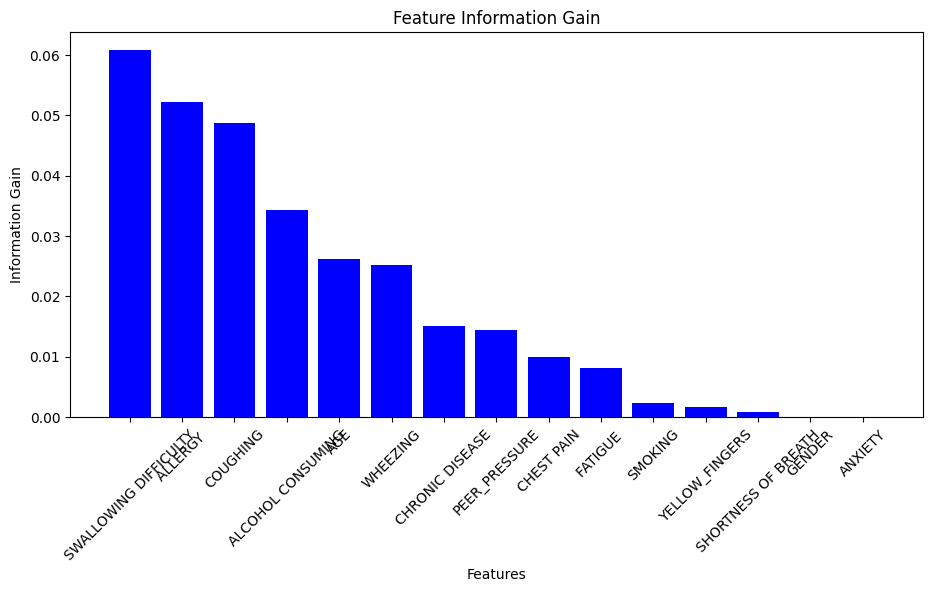

13    SWALLOWING DIFFICULTY
8                  ALLERGY 
11                 COUGHING
10        ALCOHOL CONSUMING
1                       AGE
9                  WHEEZING
6           CHRONIC DISEASE
5             PEER_PRESSURE
Name: Feature, dtype: object


In [ ]:
# Calculate mutual information
info_gain = mutual_info_classif(X, y)

# Create a DataFrame for visualization
feature_scores = pd.DataFrame({'Feature': X.columns, 'Information Gain': info_gain})
feature_scores = feature_scores.sort_values(by='Information Gain', ascending=False)  #To make the columns with the highest info gain come first

# Plotting feature importances
plt.figure(figsize=(11, 5))
plt.bar(feature_scores['Feature'], feature_scores['Information Gain'], color='b')
plt.xlabel('Features')
plt.ylabel('Information Gain')
plt.title('Feature Information Gain')
plt.xticks(rotation=45)
plt.show()

# Filter features by information gain, removing all features below the median importance
threshold = 0.01
selected_features = feature_scores[feature_scores['Information Gain'] >= threshold]['Feature']

# Filtered data with selected features
X_filtered = X[selected_features]   #This is the dataframe we'll continue to use from here on (the imp features after checking info gain)
print(selected_features)

#Task 3 – Classification Models

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Define models and parameters
models = {
    'AdaBoost Classifier': AdaBoostClassifier(n_estimators = 50, learning_rate = 1.0, random_state = 42),    #Some paramenters: n_estimators = 50, learning_rate = 1.0, random_state = 42
    'Decision Tree Classifier': DecisionTreeClassifier(max_depth = 8,min_samples_split = 5,  min_samples_leaf = 3),                 #Some parameters: max_depth = 8, min_samples_split = 5,  min_samples_leaf = 3
    'XGBoost Classifier': XGBClassifier(n_estimators = 100, learning_rate = 1.0, eval_metric = 'logloss'),                         #Some parameters = n_estimators, learning_rate, eval_metric = 'logloss'
    'Gaussian Naïve Bayes Classifier': GaussianNB(var_smoothing = 1e-5),
}



#Task 4 – Model Evaluation

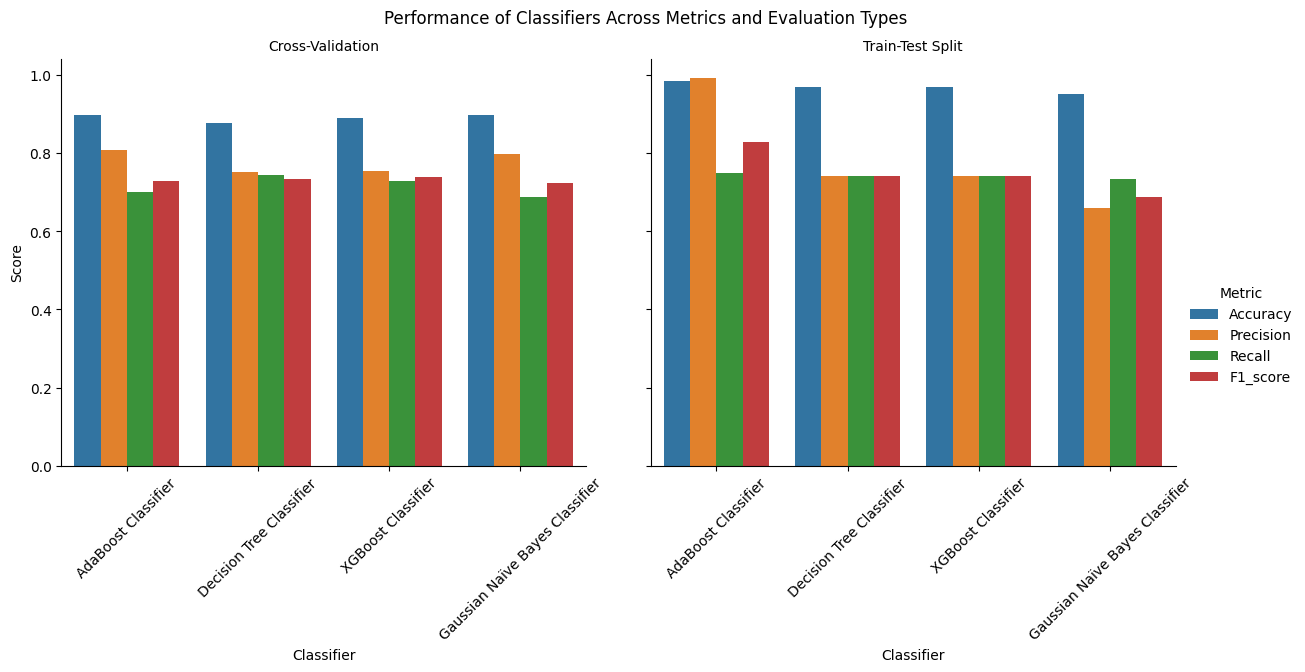

In [ ]:
# Scoring and collecting results
scoring = {
   'Accuracy'  :  'accuracy',
   'Precision' :  'precision_macro',
   'Recall'    :  'recall_macro',
   'F1_score'  :  'f1_macro'
}

results = [] #Creating a dictionary for visualization later on

for name, model in models.items():
    # Cross-validation
    cv_scores = cross_validate(model, X_filtered, y, scoring = scoring, cv = 3, return_train_score = False)
    for metric in scoring:
        results.append({
            'Classifier': name,
            'Metric': metric,
            'Score': np.mean(cv_scores['test_' + metric]),
            'Evaluation Type': 'Cross-Validation'
        })


    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_scores = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1_score': f1_score(y_test, y_pred, average='macro')
    }
    for metric, score in test_scores.items():
        results.append({
            'Classifier': name,
            'Metric': metric,
            'Score': score,
            'Evaluation Type': 'Train-Test Split'
        })

# Plotting
results_df = pd.DataFrame(results)
g = sns.catplot(x='Classifier', y='Score', hue='Metric', col='Evaluation Type', data=results_df, kind='bar', height=5, aspect=1.2)
g.set_xticklabels(rotation=45)
g.set_titles("{col_name}")
g.fig.suptitle('Performance of Classifiers Across Metrics and Evaluation Types', y=1.03)
plt.show()


#Task 5 – Gradio Deployment

In [ ]:
!pip install gradio
import gradio as gr


# Select specific features for prediction
selected_features = ['SWALLOWING DIFFICULTY', 'FATIGUE ', 'ALLERGY ', 'ALCOHOL CONSUMING', 'WHEEZING', 'YELLOW_FINGERS', 'COUGHING', 'CHEST PAIN']
  #the ones selected from the info gain
X = data[selected_features]
y = data['LUNG_CANCER']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = AdaBoostClassifier(n_estimators = 50, learning_rate = 1.0, random_state = 42) #The one selected from the cross validation
model.fit(X_train, y_train)

# Define the prediction function
def predict_lung_cancer(swallowing_difficulty, fatigue, allergy, alcohol_consuming, wheezing, yellow_fingers, coughing, chest_pain): #Selected features
    input_data = pd.DataFrame([[
        swallowing_difficulty, fatigue, allergy, alcohol_consuming, wheezing, yellow_fingers, coughing, chest_pain
    ]], columns=selected_features)
    input_data = input_data.astype(float)  # Convert all inputs to float
    probability = model.predict_proba(input_data)[0][1]  # Probability of '1' (disease present)
    return f"{probability:.2%}"

# Setup Gradio interface with custom labels for each input
iface = gr.Interface(
    fn=predict_lung_cancer,
    inputs=[
        gr.Number(label="Swallowing Difficulty"),
        gr.Number(label="Fatigue"),
        gr.Number(label="Allergy"),
        gr.Number(label="Alcohol Consuming"),
        gr.Number(label="Wheezing"),
        gr.Number(label="Yellow Fingers"),
        gr.Number(label="Coughing"),
        gr.Number(label="Chest Pain")
    ],
    outputs=gr.Textbox(label="Probability of Lung Cancer"),
    title="Lung Cancer Prediction using AdaBoost",
    description="Enter the values for each health feature to predict the likelihood of lung cancer."
)

iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://78e322e47ad60b234a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
